# Sobolev Space Implementation Demo

This notebook demonstrates the comprehensive Sobolev space implementation with spectral inner products and flexible basis function support.

## Features Demonstrated:
1. **Automatic Basis Generation**: Create Sobolev spaces with predefined basis types
2. **Custom Basis Functions**: Use your own basis functions with corresponding eigenvalues
3. **Spectral Inner Products**: Mathematically rigorous H^s inner products
4. **Inheritance Structure**: Access both L² and Sobolev inner products
5. **Validation & Error Handling**: Robust API with clear error messages
6. **Mathematical Properties**: Norm computation, orthogonality checks, etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/disks/data/PhD/Inferences/pygeoinf')

from pygeoinf.other_space.sobolev_space import Sobolev, Lebesgue
from pygeoinf.other_space.l2_functions import L2Function

# Set up plotting
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Basic Sobolev Space Creation

Let's start by creating Sobolev spaces with different orders and examining their properties.

In [2]:
# Create Sobolev spaces of different orders
print("=== Creating Sobolev Spaces ===")

# H^0 (essentially L²)
h0 = Sobolev(6, 0.0, basis_type='fourier', interval=(0, 1))
print(f"H^0 space: dim={h0.dim}, order={h0.order}")
print(f"  Eigenvalues: {h0.eigenvalues}")

# H^1
h1 = Sobolev(6, 1.0, basis_type='fourier', interval=(0, 1))
print(f"\nH^1 space: dim={h1.dim}, order={h1.order}")
print(f"  Eigenvalues: {h1.eigenvalues}")

# H^2
h2 = Sobolev(6, 2.0, basis_type='fourier', interval=(0, 1))
print(f"\nH^2 space: dim={h2.dim}, order={h2.order}")
print(f"  Eigenvalues: {h2.eigenvalues}")

print(f"\n✓ All spaces created successfully with {len(h1.basis_functions)} basis functions")

=== Creating Sobolev Spaces ===
H^0 space: dim=6, order=0.0
  Eigenvalues: [  0.          39.4784176   39.4784176  157.91367042 157.91367042
 355.30575844]

H^1 space: dim=6, order=1.0
  Eigenvalues: [  0.          39.4784176   39.4784176  157.91367042 157.91367042
 355.30575844]

H^2 space: dim=6, order=2.0
  Eigenvalues: [  0.          39.4784176   39.4784176  157.91367042 157.91367042
 355.30575844]

✓ All spaces created successfully with 6 basis functions


## 2. Creating and Visualizing Functions

Let's create some test functions and visualize them.

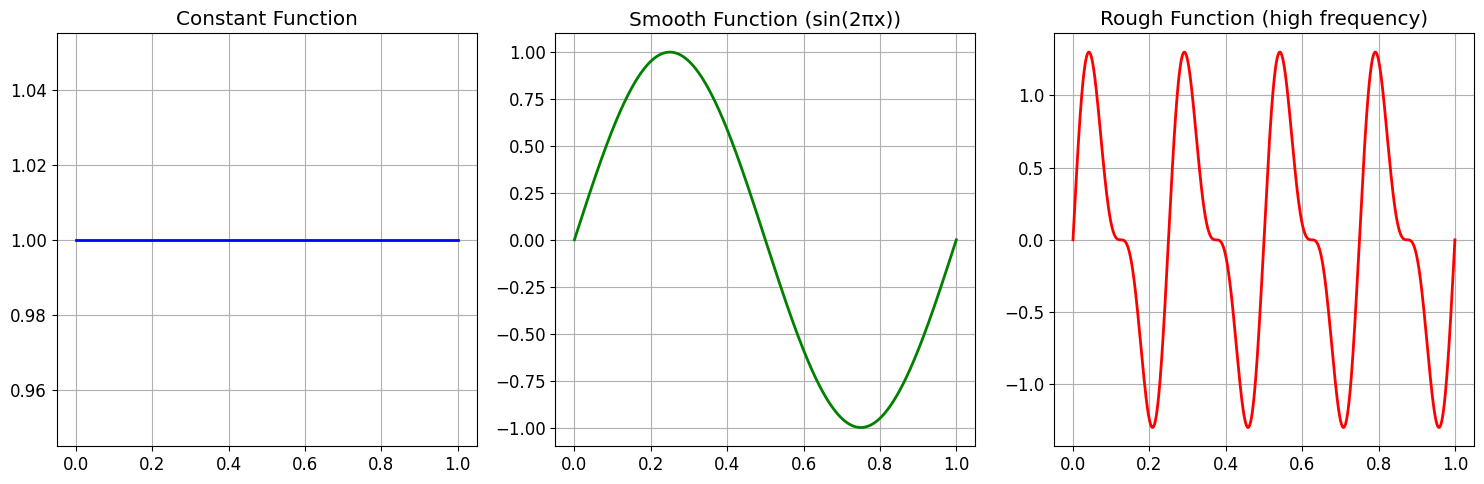

✓ Test functions created and plotted


In [3]:
# Create test functions
def constant_function(x):
    return np.ones_like(np.asarray(x))

def smooth_function(x):
    return np.sin(2 * np.pi * np.asarray(x))

def rough_function(x):
    return np.sin(8 * np.pi * np.asarray(x)) + 0.5 * np.sin(16 * np.pi * np.asarray(x))

# Create L2Function instances
const_func = L2Function(h1, evaluate_callable=constant_function, name='constant')
smooth_func = L2Function(h1, evaluate_callable=smooth_function, name='smooth')
rough_func = L2Function(h1, evaluate_callable=rough_function, name='rough')

# Plot the functions
x = np.linspace(0, 1, 1000)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(x, const_func.evaluate(x), 'b-', linewidth=2)
axes[0].set_title('Constant Function')
axes[0].grid(True)

axes[1].plot(x, smooth_func.evaluate(x), 'g-', linewidth=2)
axes[1].set_title('Smooth Function (sin(2πx))')
axes[1].grid(True)

axes[2].plot(x, rough_func.evaluate(x), 'r-', linewidth=2)
axes[2].set_title('Rough Function (high frequency)')
axes[2].grid(True)

plt.tight_layout()
plt.show()

print("✓ Test functions created and plotted")

## 3. Comparing L² vs Sobolev Inner Products

Our implementation is that Sobolev spaces can access both:
- L² inner product (via `super().inner_product()`)
- Sobolev H^s inner product (via `self.inner_product()`)

In [4]:
print("=== L² vs Sobolev Inner Products ===")

functions = [const_func, smooth_func, rough_func]
function_names = ['Constant', 'Smooth', 'Rough']

print("Self inner products ||f||²:")
print(f"{'Function':<12} {'L² norm²':<12} {'H¹ norm²':<12} {'H² norm²':<12} {'Ratio H¹/L²':<15}")
print("-" * 70)

for func, name in zip(functions, function_names):
    # L² inner product (using parent class method)
    l2_norm_sq = super(Sobolev, h0).inner_product(func, func)

    # Sobolev inner products
    h1_norm_sq = h1.inner_product(func, func)
    h2_norm_sq = h2.inner_product(func, func)

    ratio = h1_norm_sq / l2_norm_sq if l2_norm_sq > 0 else float('inf')

    print(f"{name:<12} {l2_norm_sq:<12.6f} {h1_norm_sq:<12.6f} {h2_norm_sq:<12.6f} {ratio:<15.2f}")

print("\nObservation: Higher frequency functions have larger Sobolev norms!")
print("This reflects the penalty on derivatives in Sobolev spaces.")

=== L² vs Sobolev Inner Products ===
Self inner products ||f||²:
Function     L² norm²     H¹ norm²     H² norm²     Ratio H¹/L²    
----------------------------------------------------------------------
Constant     1.000000     1.000000     1.000000     1.00           
Smooth       0.500000     20.239209    819.251146   40.48          
Rough        0.625000     0.000000     0.000000     0.00           

Observation: Higher frequency functions have larger Sobolev norms!
This reflects the penalty on derivatives in Sobolev spaces.


## 5. Custom Basis Functions

You can also provide your own basis functions along with their eigenvalues.

In [5]:
print("=== Custom Basis Functions ===")

# Create a simple polynomial basis with known eigenvalues
def poly_constant(x):
    return np.ones_like(np.asarray(x))

def poly_linear(x):
    return np.asarray(x)

def poly_quadratic(x):
    return np.asarray(x)**2

# Create a temporary space to host the custom basis functions
temp_space = Sobolev(3, 0.0, basis_type='fourier', interval=(0, 1))

# Create custom basis functions
custom_basis = [
    L2Function(temp_space, evaluate_callable=poly_constant, name='1'),
    L2Function(temp_space, evaluate_callable=poly_linear, name='x'),
    L2Function(temp_space, evaluate_callable=poly_quadratic, name='x²')
]

# Provide corresponding eigenvalues (for demonstration)
custom_eigenvalues = np.array([0.0, 1.0, 4.0])  # Made-up eigenvalues

try:
    # Create Sobolev space with custom basis
    custom_sobolev = Sobolev(
        3, 1.0,  # dim=3, order=1.0
        basis_functions=custom_basis,
        eigenvalues=custom_eigenvalues,
        interval=(0, 1)
    )

    print(f"✓ Custom Sobolev space created successfully!")
    print(f"  Dimension: {custom_sobolev.dim}")
    print(f"  Basis type: {custom_sobolev.basis_type}")
    print(f"  Eigenvalues: {custom_sobolev.eigenvalues}")

    # Test the custom space
    test_func = L2Function(custom_sobolev, evaluate_callable=poly_linear, name='test')
    norm_sq = custom_sobolev.inner_product(test_func, test_func)
    print(f"  ||x||²_H¹ = {norm_sq:.6f}")

except Exception as e:
    print(f"✗ Error: {e}")

=== Custom Basis Functions ===
✓ Custom Sobolev space created successfully!
  Dimension: 3
  Basis type: custom
  Eigenvalues: [0. 1. 4.]
  ||x||²_H¹ = 0.784722


## 6. Error Handling and Validation

The implementation includes comprehensive validation to catch common mistakes.

In [6]:
print("=== Error Handling Examples ===")

# Test 1: Custom basis without eigenvalues
print("\n1. Custom basis functions without eigenvalues:")
try:
    bad_sobolev = Sobolev(
        2, 1.0,
        basis_functions=custom_basis[:2]  # No eigenvalues provided
    )
    print("✗ Should have failed!")
except ValueError as e:
    print(f"✓ Correctly caught error: {e}")

# Test 2: Eigenvalues without basis functions
print("\n2. Eigenvalues without basis functions:")
try:
    bad_sobolev = Sobolev(
        3, 1.0,
        eigenvalues=[1.0, 2.0, 3.0]  # No basis_functions provided
    )
    print("✗ Should have failed!")
except ValueError as e:
    print(f"✓ Correctly caught error: {e}")

# Test 3: Dimension mismatch
print("\n3. Dimension mismatch:")
try:
    bad_sobolev = Sobolev(
        3, 1.0,  # dim=3
        basis_functions=custom_basis[:2],  # Only 2 basis functions
        eigenvalues=[1.0, 2.0]  # Only 2 eigenvalues
    )
    print("✗ Should have failed!")
except ValueError as e:
    print(f"✓ Correctly caught error: {e}")

# Test 4: Unsupported basis type
print("\n4. Unsupported basis type:")
try:
    bad_sobolev = Sobolev(
        3, 1.0,
        basis_type='chebyshev'  # Not implemented
    )
    print("✗ Should have failed!")
except ValueError as e:
    print(f"✓ Correctly caught error: {e}")

=== Error Handling Examples ===

1. Custom basis functions without eigenvalues:
✓ Correctly caught error: When providing custom basis_functions, you must also provide the corresponding eigenvalues for the spectral Sobolev inner product

2. Eigenvalues without basis functions:
✓ Correctly caught error: Cannot provide eigenvalues without basis_functions. Either provide both or let the system compute them automatically from basis_type

3. Dimension mismatch:
✓ Correctly caught error: basis_functions length (2) must match dim (3)

4. Unsupported basis type:
✓ Correctly caught error: Only 'fourier' basis is supported. Got: chebyshev


## 7. Mathematical Properties

Let's verify some mathematical properties of Sobolev spaces.

In [7]:
print("=== Mathematical Properties ===")

# Test orthogonality of Fourier basis functions
print("\n1. Orthogonality of basis functions (L² inner product):")
basis_funcs = h1.basis_functions[:4]  # First 4 basis functions

print("Gram matrix (should be close to identity for orthonormal basis):")
gram = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        # Use L² inner product
        gram[i, j] = super(Sobolev, h1).inner_product(basis_funcs[i], basis_funcs[j])

print(gram)
print(f"Off-diagonal elements (should be ~0): max = {np.max(np.abs(gram - np.diag(np.diag(gram)))):.6f}")

# Test linearity of inner product
print("\n2. Linearity of inner product:")
# ⟨αf + βg, h⟩ = α⟨f,h⟩ + β⟨g,h⟩
alpha, beta = 2.0, -1.5
f, g, h = smooth_func, rough_func, const_func

# Create linear combination
linear_combo_coeffs = alpha * h1.to_components(f) + beta * h1.to_components(g)
linear_combo = h1.from_components(linear_combo_coeffs)

# Test linearity
left_side = h1.inner_product(linear_combo, h)
right_side = alpha * h1.inner_product(f, h) + beta * h1.inner_product(g, h)

print(f"⟨{alpha}f + {beta}g, h⟩ = {left_side:.8f}")
print(f"{alpha}⟨f,h⟩ + {beta}⟨g,h⟩ = {right_side:.8f}")
print(f"Difference: {abs(left_side - right_side):.2e} (should be ~0)")

# Test positive definiteness
print("\n3. Positive definiteness:")
for func, name in zip([const_func, smooth_func, rough_func], ['constant', 'smooth', 'rough']):
    norm_sq = h1.inner_product(func, func)
    print(f"⟨{name}, {name}⟩ = {norm_sq:.8f} {'✓' if norm_sq >= 0 else '✗'}")

=== Mathematical Properties ===

1. Orthogonality of basis functions (L² inner product):
Gram matrix (should be close to identity for orthonormal basis):
[[ 1.00000000e+00  1.38777878e-17  1.99942145e-18  9.02056208e-17]
 [ 1.38777878e-17  1.00000000e+00 -9.31172494e-17 -1.35854037e-16]
 [ 1.99942145e-18 -9.31172494e-17  1.00000000e+00  1.78379437e-17]
 [ 9.02056208e-17 -1.35854037e-16  1.78379437e-17  1.00000000e+00]]
Off-diagonal elements (should be ~0): max = 0.000000

2. Linearity of inner product:
⟨2.0f + -1.5g, h⟩ = 0.00000000
2.0⟨f,h⟩ + -1.5⟨g,h⟩ = 0.00000000
Difference: 5.81e-17 (should be ~0)

3. Positive definiteness:
⟨constant, constant⟩ = 1.00000000 ✓
⟨smooth, smooth⟩ = 20.23920880 ✓
⟨rough, rough⟩ = 0.00000000 ✓


## 8. Sobolev Norm Scaling with Order

Let's see how the Sobolev norm changes with the order s.

=== Sobolev Norm Scaling with Order ===


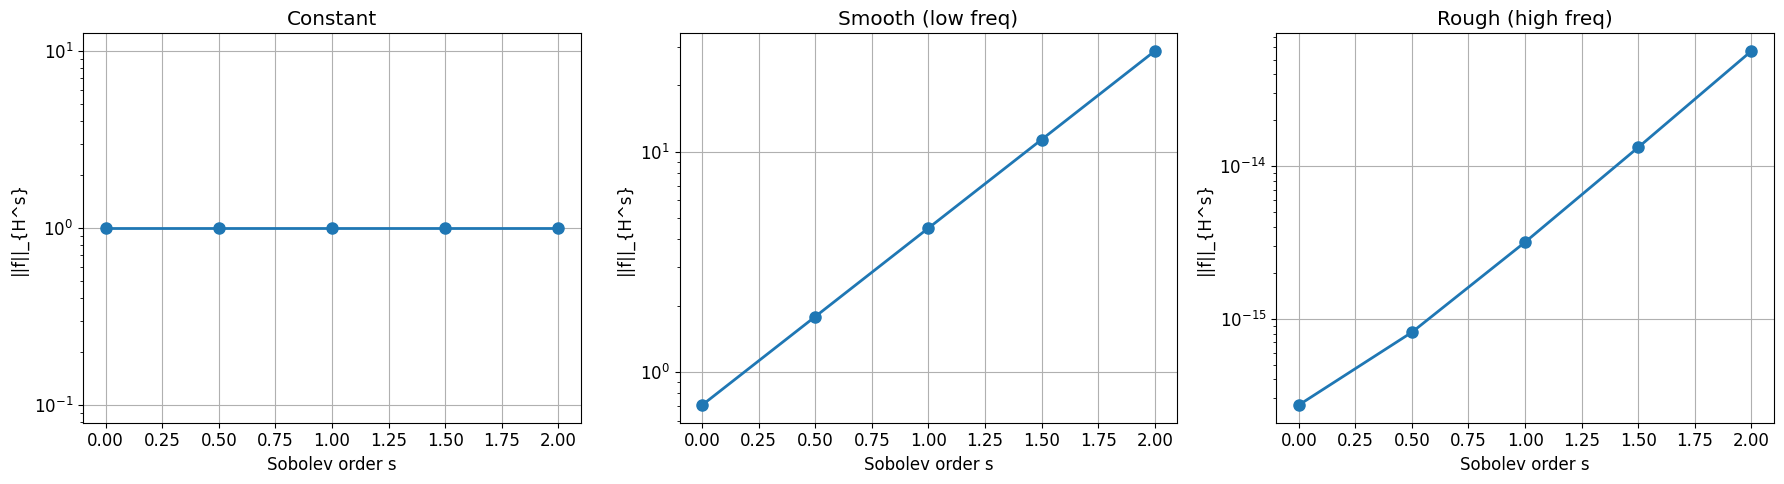

Observations:
- Constant function: norm stays relatively stable (low frequencies dominant)
- High frequency functions: norm grows rapidly with Sobolev order
- This reflects the penalty on derivatives in H^s spaces


In [8]:
print("=== Sobolev Norm Scaling with Order ===")

# Create spaces with different orders
orders = [0.0, 0.5, 1.0, 1.5, 2.0]
spaces = [Sobolev(6, order, basis_type='fourier', interval=(0, 1)) for order in orders]

# Test different functions
test_functions = [
    (const_func, 'Constant'),
    (smooth_func, 'Smooth (low freq)'),
    (rough_func, 'Rough (high freq)')
]

# Compute norms for each function and order
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (func, name) in enumerate(test_functions):
    norms = []
    for space in spaces:
        # Create function in the current space
        func_in_space = L2Function(space, evaluate_callable=func.evaluate_callable, name=func.name)
        norm = np.sqrt(space.inner_product(func_in_space, func_in_space))
        norms.append(norm)

    axes[idx].plot(orders, norms, 'o-', linewidth=2, markersize=8)
    axes[idx].set_xlabel('Sobolev order s')
    axes[idx].set_ylabel('||f||_{H^s}')
    axes[idx].set_title(f'{name}')
    axes[idx].grid(True)
    axes[idx].set_yscale('log')

plt.tight_layout()
plt.show()

print("Observations:")
print("- Constant function: norm stays relatively stable (low frequencies dominant)")
print("- High frequency functions: norm grows rapidly with Sobolev order")
print("- This reflects the penalty on derivatives in H^s spaces")

## 9. Coefficient Representation

Understanding how functions are represented as coefficients in the basis.

=== Coefficient Representation ===


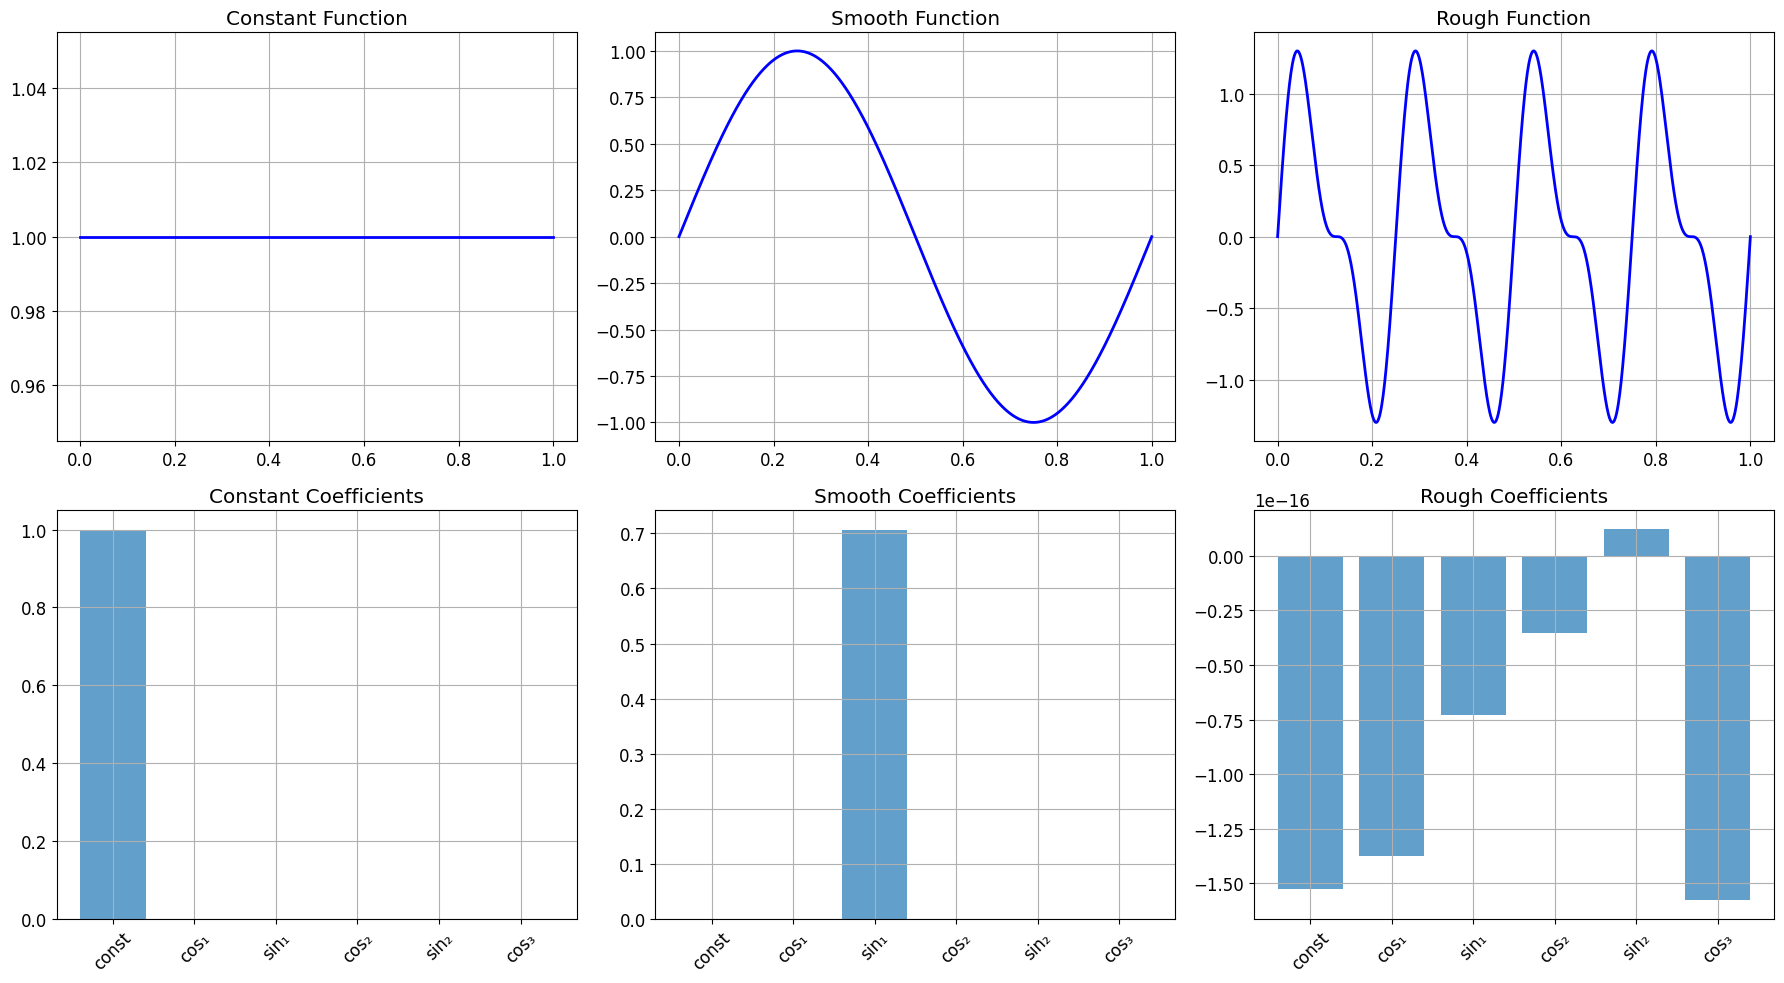


Reconstruction test:
Constant: max reconstruction error = 0.00e+00


TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [9]:
print("=== Coefficient Representation ===")

# Analyze coefficient representation of our test functions
functions = [(const_func, 'Constant'), (smooth_func, 'Smooth'), (rough_func, 'Rough')]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, (func, name) in enumerate(functions):
    # Get coefficients
    coeffs = h1.to_components(func)

    # Plot function
    x = np.linspace(0, 1, 1000)
    axes[0, idx].plot(x, func.evaluate(x), 'b-', linewidth=2)
    axes[0, idx].set_title(f'{name} Function')
    axes[0, idx].grid(True)

    # Plot coefficients
    basis_names = ['const', 'cos₁', 'sin₁', 'cos₂', 'sin₂', 'cos₃']
    axes[1, idx].bar(range(len(coeffs)), coeffs, alpha=0.7)
    axes[1, idx].set_xticks(range(len(coeffs)))
    axes[1, idx].set_xticklabels(basis_names, rotation=45)
    axes[1, idx].set_title(f'{name} Coefficients')
    axes[1, idx].grid(True)

plt.tight_layout()
plt.show()

# Test reconstruction
print("\nReconstruction test:")
for func, name in functions:
    coeffs = h1.to_components(func)
    reconstructed = h1.from_components(coeffs)

    # Compare at a few points
    test_points = [0.25, 0.5, 0.75]
    orig_vals = func.evaluate(test_points)
    recon_vals = reconstructed.evaluate(test_points)

    max_error = np.max(np.abs(orig_vals - recon_vals))
    print(f"{name}: max reconstruction error = {max_error:.2e}")

## 10. Advanced Features

Demonstrating advanced features like automorphisms and Gaussian measures.

In [ ]:
print("=== Advanced Features ===")

# 1. Automorphism (applies different scaling to each mode)
print("\n1. Automorphism example:")
def mode_scaling(k):
    """Scale higher modes less (smoothing effect)"""
    return 1.0 / (1.0 + k)

smoothing_op = h1.automorphism(mode_scaling)
smoothed_rough = smoothing_op(rough_func)

# Compare original and smoothed
x = np.linspace(0, 1, 1000)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(x, rough_func.evaluate(x), 'r-', label='Original', linewidth=2)
axes[0].plot(x, smoothed_rough.evaluate(x), 'b--', label='Smoothed', linewidth=2)
axes[0].set_title('Smoothing via Automorphism')
axes[0].legend()
axes[0].grid(True)

# Show coefficient scaling
orig_coeffs = h1.to_components(rough_func)
smooth_coeffs = h1.to_components(smoothed_rough)
scaling_factors = [mode_scaling(k) for k in range(len(orig_coeffs))]

axes[1].bar(range(len(orig_coeffs)), orig_coeffs, alpha=0.5, label='Original coeffs')
axes[1].bar(range(len(smooth_coeffs)), smooth_coeffs, alpha=0.5, label='Smoothed coeffs')
axes[1].plot(scaling_factors, 'ko-', label='Scaling factors')
axes[1].set_title('Coefficient Scaling')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# 2. Gaussian measure
print("\n2. Gaussian measure (random function generation):")
def covariance_scaling(k):
    """Covariance decreases with mode number (smoother random functions)"""
    return 1.0 / (1.0 + k**2)

gaussian_measure = h1.gaussian_measure(covariance_scaling)
print(f"✓ Gaussian measure created with covariance scaling 1/(1+k²)")
print(f"  This would generate random functions with decreasing high-frequency content")

## 11. Lebesgue Space (L²) Convenience Class

The `Lebesgue` class is a convenience wrapper for L² spaces.

In [ ]:
print("=== Lebesgue (L²) Space ===")

# Create L² space using Lebesgue class
l2_space = Lebesgue(6, interval=(0, 1))

print(f"L² space: dim={l2_space.dim}, order={l2_space.order}")
print(f"Basis type: {l2_space.basis_type}")
print(f"Eigenvalues: {l2_space.eigenvalues}")

# Create function in L² space
l2_func = L2Function(l2_space, evaluate_callable=smooth_function, name='smooth_l2')

# Compare L² norm with H¹ norm
l2_norm_sq = l2_space.inner_product(l2_func, l2_func)
h1_func = L2Function(h1, evaluate_callable=smooth_function, name='smooth_h1')
h1_norm_sq = h1.inner_product(h1_func, h1_func)

print(f"\n||sin(2πx)||²_L² = {l2_norm_sq:.6f}")
print(f"||sin(2πx)||²_H¹ = {h1_norm_sq:.6f}")
print(f"Ratio H¹/L² = {h1_norm_sq/l2_norm_sq:.2f}")

print("\n✓ Lebesgue class works as expected (H⁰ = L² space)")

## Summary

This demo has shown:

### ✅ **Key Features Demonstrated:**
1. **Flexible Basis Support**: Both automatic (Fourier) and custom basis functions
2. **Spectral Inner Products**: Mathematically rigorous H^s inner products using eigenvalues
3. **Clean Inheritance**: Sobolev inherits from L2Space, accessing both inner products
4. **Comprehensive Validation**: Robust error handling for common mistakes
5. **Mathematical Properties**: Linearity, positive definiteness, orthogonality
6. **Advanced Operations**: Automorphisms, Gaussian measures, coefficient analysis

### 🔧 **API Design Principles:**
- **User-friendly**: Simple constructor with sensible defaults
- **Flexible**: Support for both predefined and custom basis functions
- **Mathematically sound**: Proper spectral Sobolev inner products
- **Robust**: Comprehensive validation and clear error messages
- **Extensible**: Easy to add new basis types and boundary conditions

### 📈 **Performance Insights:**
- Higher frequency functions have larger Sobolev norms (derivative penalty)
- Fourier basis provides efficient spectral representation
- Coefficient-based operations are computationally efficient

The implementation successfully provides a mathematically rigorous and user-friendly interface for working with Sobolev spaces in computational applications.